In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
df=pd.read_csv('landslide_data_original.csvwinequality_red_original(1).csv')
df

,dates,stationid,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,08-07-2018,t10,25.46875,82.18750,1036.346875,6.75,5.5000,4000,0.0000
1,09-07-2018,t10,26.19298,83.14912,1037.604386,1761.75,11.8448,4000,5.6930
2,10-07-2018,t10,25.17021,85.34043,1037.889362,652.50,8.7692,4000,6.8511
3,11-07-2018,t10,24.29851,87.68657,1036.857463,963.00,8.8358,4000,6.0373
4,12-07-2018,t10,24.06923,87.64615,1027.830769,254.25,274.6232,4333,31.2385
...,...,...,...,...,...,...,...,...,...
940,21-11-2018,t9,16.65926,58.69630,1026.797407,73577.25,5521.1231,47460,54.4222
941,22-11-2018,t9,15.52482,63.16312,1027.495248,65301.75,5521.1231,47460,54.5674
942,23-11-2018,t9,15.81560,59.21277,1029.318511,73534.50,5521.1231,47460,54.8794
943,24-11-2018,t9,16.58571,54.63571,1026.776357,72283.50,5521.1231,47460,55.0286


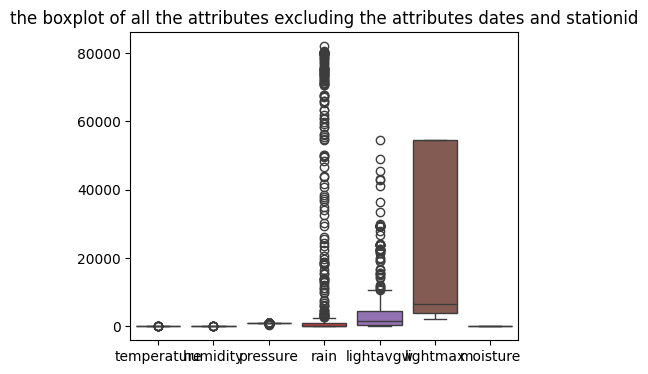

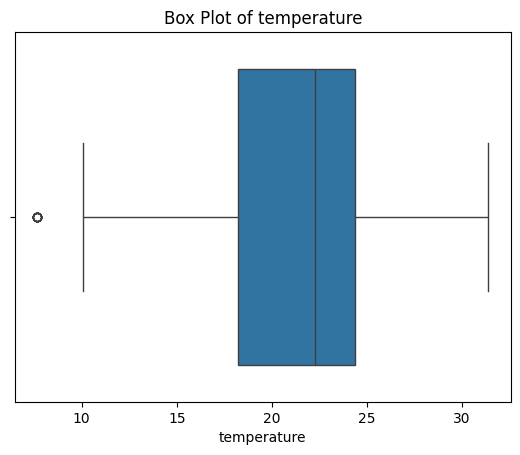

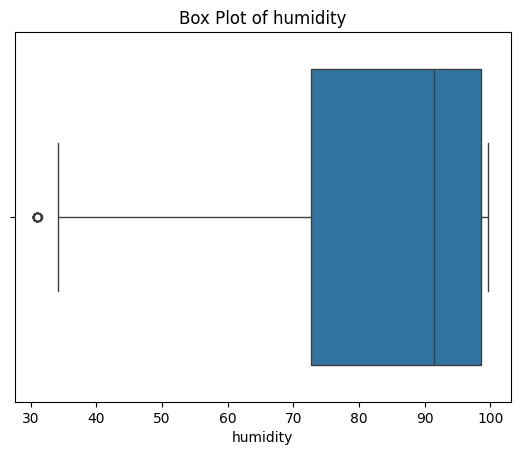

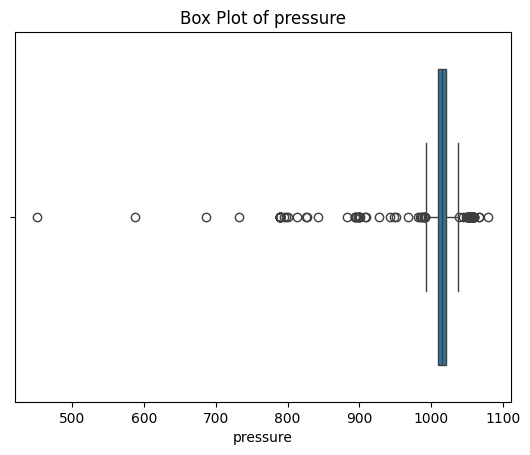

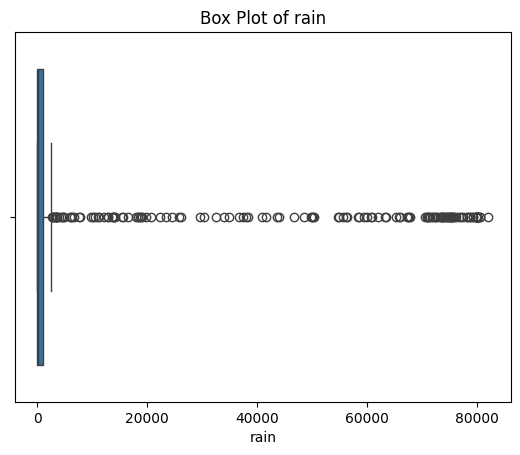

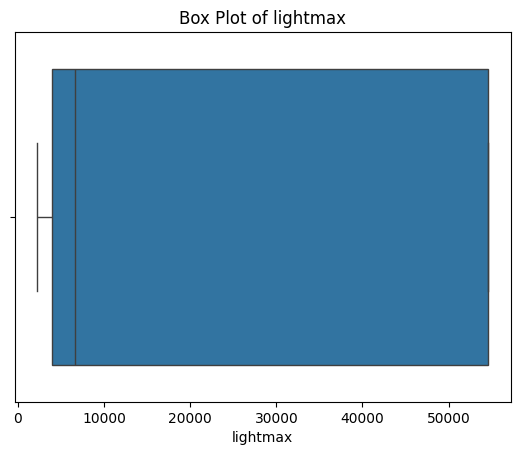

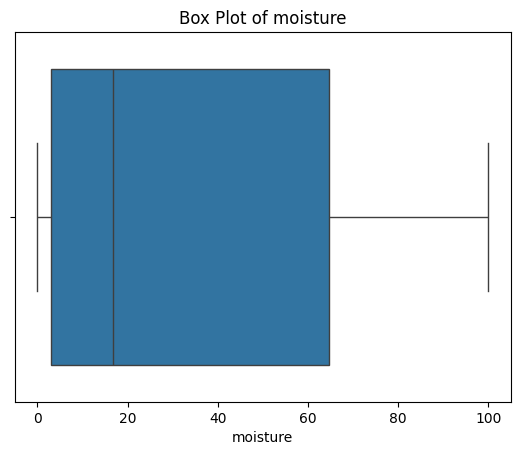

In [6]:
df_demo=df.drop(columns=['dates','stationid'],errors='ignore')
plt.figure(figsize=(5,4))
plt.title("the boxplot of all the attributes excluding the attributes dates and stationid")
sns.boxplot(data=df_demo)
plt.show()
sns.boxplot(x='temperature',data=df)
plt.title('Box Plot of temperature')
plt.show()
sns.boxplot(x='humidity',data=df)
plt.title('Box Plot of humidity')
plt.show()
sns.boxplot(x='pressure',data=df)
plt.title('Box Plot of pressure')
plt.show()
sns.boxplot(x='rain',data=df)
plt.title('Box Plot of rain')dataplot = sb.heatmap(data.corr(numeric_only=True), cmap="YlGnBu", annot=True)

plt.show()
sns.boxplot(x='lightmax',data=df)
plt.title('Box Plot of lightmax')
plt.show()
sns.boxplot(x='moisture',data=df)
plt.title('Box Plot of moisture')
plt.show()

In [35]:
df_demo=df.drop(columns=['dates','stationid'],axis=1)
q1=df_demo.quantile(0.25)
q3=df_demo.quantile(0.75)
IQR=q3-q1
lowerbound=q1 - 1.5*IQR
upperbound=q3 + 1.5*IQR
outliers=( (df_demo < lowerbound) | (df_demo > upperbound) )
outliers.sum()

temperature     10
humidity         8
pressure       132
rain           184
lightavgw       85
lightmax         0
moisture         0
dtype: int64

In [ ]:
q1=df_demo.quantile(0.25)
q3=df_demo.quantile(0.75)
IQR=q3-q1
lowerbound=q1 - 1.5*IQR
upperbound=q3 + 1.5*IQR
outliers=( (df_demo < lowerbound) | (df_demo > upperbound) )
df_new=df.drop(columns=['dates','stationid'],axis=1)
for col in df_new.columns[2:]:
    med=df_new[col].median()
    df_demo[col]=np.where( outliers[col],med,df_new[col])

    
df_demo.to_csv('landslide data corrected.csv')
print(df_demo)

     temperature  humidity     pressure     rain  lightavgw  lightmax  \
0       25.46875  82.18750  1036.346875     6.75     5.5000    4000.0   
1       26.19298  83.14912  1037.604386  1761.75    11.8448    4000.0   
2       25.17021  85.34043  1014.677832   652.50     8.7692    4000.0   
3       24.29851  87.68657  1036.857463   963.00     8.8358    4000.0   
4       24.06923  87.64615  1027.830769   254.25   274.6232    4333.0   
..           ...       ...          ...      ...        ...       ...   
940     16.65926  58.69630  1026.797407    18.00  5521.1231   47460.0   
941     15.52482  63.16312  1027.495248    18.00  5521.1231   47460.0   
942     15.81560  59.21277  1029.318511    18.00  5521.1231   47460.0   
943     16.58571  54.63571  1026.776357    18.00  5521.1231   47460.0   
944     17.90000  49.41000  1026.771200    18.00  5783.7581   47460.0   

     moisture  
0      0.0000  
1      5.6930  
2      6.8511  
3      6.0373  
4     31.2385  
..        ...  
940   54.42

In [49]:
df_rectified=pd.read_csv('landslide data corrected.csv')
df_rectified

,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0,25.46875,82.18750,1036.346875,6.75,5.5000,4000.0,0.0000
1,1,26.19298,83.14912,1037.604386,1761.75,11.8448,4000.0,5.6930
2,2,25.17021,85.34043,1014.677832,652.50,8.7692,4000.0,6.8511
3,3,24.29851,87.68657,1036.857463,963.00,8.8358,4000.0,6.0373
4,4,24.06923,87.64615,1027.830769,254.25,274.6232,4333.0,31.2385
...,...,...,...,...,...,...,...,...
940,940,16.65926,58.69630,1026.797407,18.00,5521.1231,47460.0,54.4222
941,941,15.52482,63.16312,1027.495248,18.00,5521.1231,47460.0,54.5674
942,942,15.81560,59.21277,1029.318511,18.00,5521.1231,47460.0,54.8794
943,943,16.58571,54.63571,1026.776357,18.00,5521.1231,47460.0,55.0286


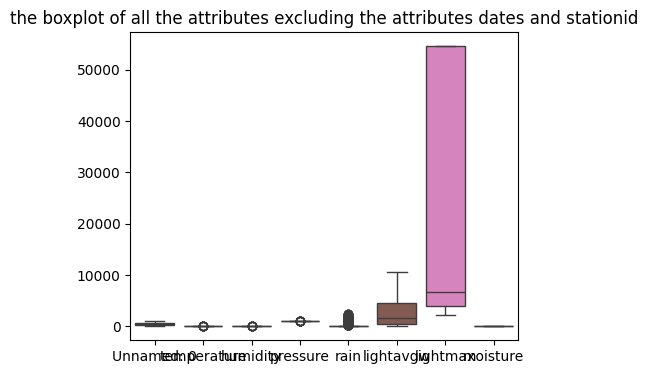

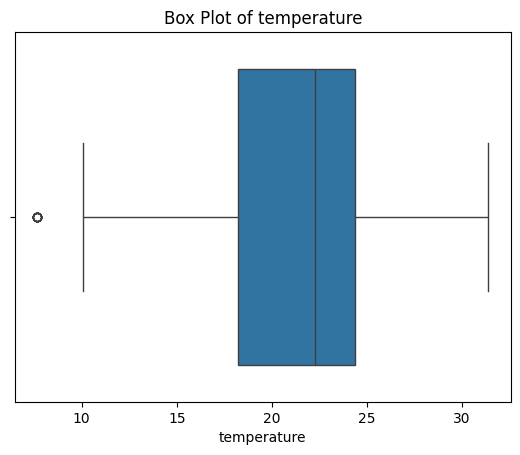

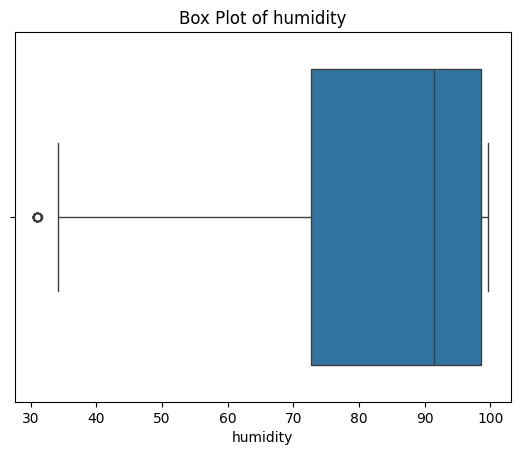

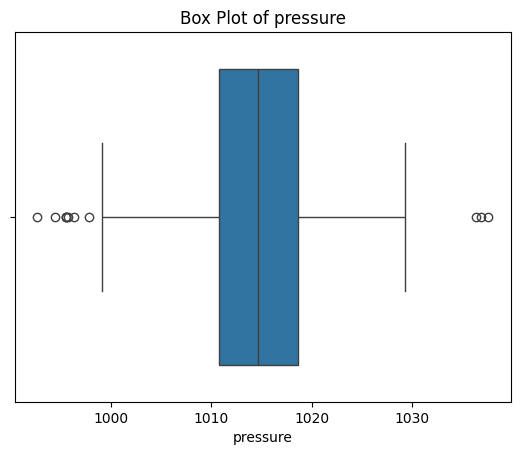

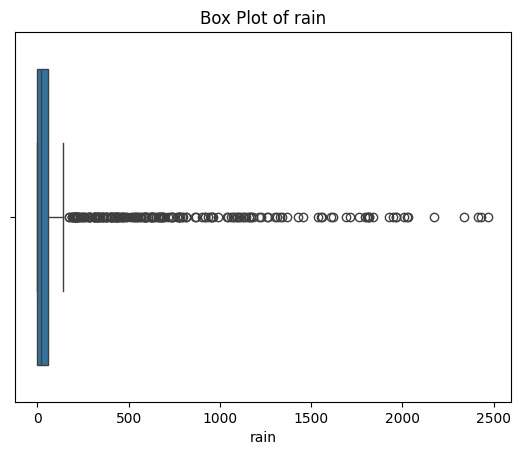

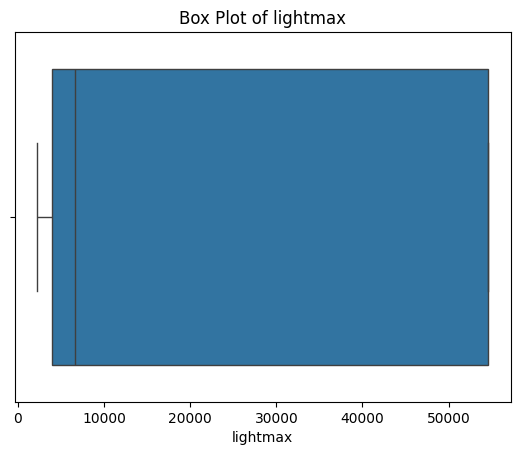

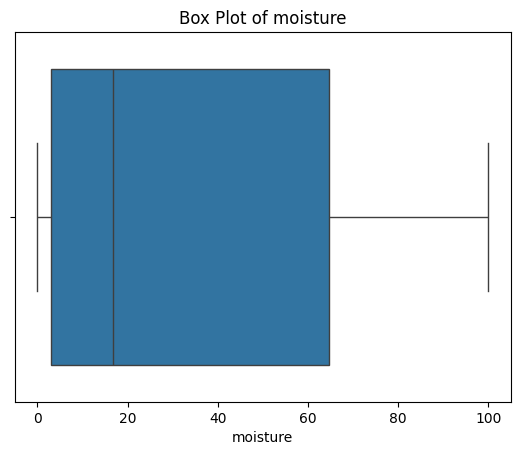

In [54]:
q1=df_rectified.quantile(0.25)
q3=df_rectified.quantile(0.75)
IQR=q3-q1
lowerbound=q1 - 1.5*IQR
upperbound=q3 + 1.5*IQR
outliers=( (df_rectified < lowerbound) | (df_rectified > upperbound) )
df_demo=df.drop(columns=['dates','stationid'],errors='ignore')
plt.figure(figsize=(5,4))
plt.title("the boxplot of all the attributes excluding the attributes dates and stationid")
sns.boxplot(data=df_rectified)
plt.show()
sns.boxplot(x='temperature',data=df_rectified)
plt.title('Box Plot of temperature')
plt.show()
sns.boxplot(x='humidity',data=df_rectified)
plt.title('Box Plot of humidity')
plt.show()
sns.boxplot(x='pressure',data=df_rectified)
plt.title('Box Plot of pressure')
plt.show()
sns.boxplot(x='rain',data=df_rectified)
plt.title('Box Plot of rain')
plt.show()
sns.boxplot(x='lightmax',data=df_rectified)
plt.title('Box Plot of lightmax')
plt.show()
sns.boxplot(x='moisture',data=df_rectified)
plt.title('Box Plot of moisture')
plt.show()

In [161]:
demo_df2=pd.read_csv('landslide_data_original.csv')
demo_df2=demo_df2.drop(columns=['dates','stationid'],axis=1)
pearson_corr = demo_df2.corr(method="pearson")
spearman_corr = demo_df2.corr(method="spearman")
print("Pearson Correlation before")
print(pearson_corr)
print("\nSpearman Correlation after")
print(spearman_corr)

Pearson Correlation before
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.401570 -0.181389 -0.108893  -0.181400 -0.145884   
humidity        0.401570  1.000000 -0.106563 -0.434917  -0.258079 -0.244442   
pressure       -0.181389 -0.106563  1.000000  0.070785   0.080186  0.099351   
rain           -0.108893 -0.434917  0.070785  1.000000   0.527490  0.312843   
lightavgw      -0.181400 -0.258079  0.080186  0.527490   1.000000  0.624435   
lightmax       -0.145884 -0.244442  0.099351  0.312843   0.624435  1.000000   
moisture        0.080660 -0.002296 -0.036067  0.426928   0.339115  0.005725   

             moisture  
temperature  0.080660  
humidity    -0.002296  
pressure    -0.036067  
rain         0.426928  
lightavgw    0.339115  
lightmax     0.005725  
moisture     1.000000  

Spearman Correlation after
             temperature  humidity  pressure      rain  lightavgw  lightmax  \
temperature     1.000000  0.274548 -0.578

In [157]:

demo_df1=pd.read_csv('landslide data corrected.csv')
pearson_corr = demo_df1.corr(method="pearson")
spearman_corr = demo_df1.corr(method="spearman")
print("Pearson Correlation after")
print(pearson_corr)
print("\nSpearman Correlation after")
print(spearman_corr)


Pearson Correlation after
             Unnamed: 0  temperature  humidity  pressure      rain  lightavgw  \
Unnamed: 0     1.000000    -0.136875 -0.109395  0.309962  0.006565  -0.063575   
temperature   -0.136875     1.000000  0.401570 -0.509135  0.088697  -0.049184   
humidity      -0.109395     0.401570  1.000000 -0.383124  0.214690  -0.139448   
pressure       0.309962    -0.509135 -0.383124  1.000000 -0.154401   0.193551   
rain           0.006565     0.088697  0.214690 -0.154401  1.000000   0.061091   
lightavgw     -0.063575    -0.049184 -0.139448  0.193551  0.061091   1.000000   
lightmax      -0.054949    -0.145884 -0.244442  0.112807 -0.009136   0.674637   
moisture       0.631191     0.080660 -0.002296  0.093579  0.170120  -0.066839   

             lightmax  moisture  
Unnamed: 0  -0.054949  0.631191  
temperature -0.145884  0.080660  
humidity    -0.244442 -0.002296  
pressure     0.112807  0.093579  
rain        -0.009136  0.170120  
lightavgw    0.674637 -0.066839  
lightm

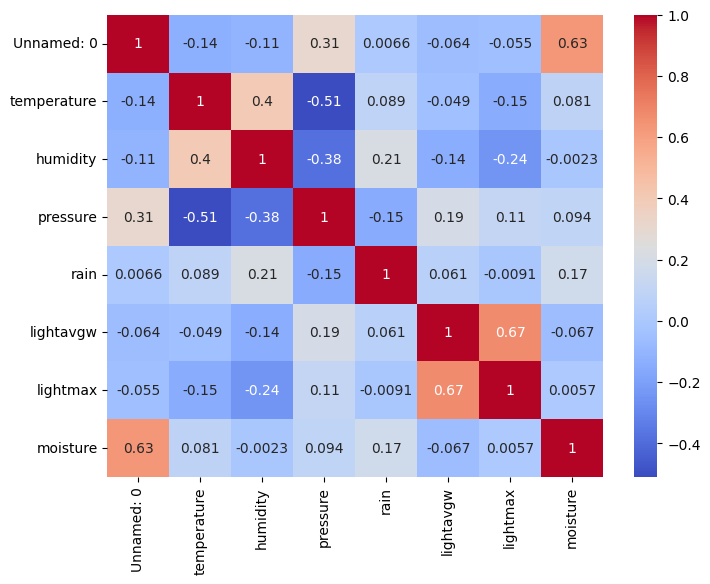

In [65]:
plt.figure(figsize=(8, 6))
dataplot = sns.heatmap(df2.corr(numeric_only=True), cmap="coolwarm", annot=True)
plt.show()


#Scatter Plot between each attribute and the Target


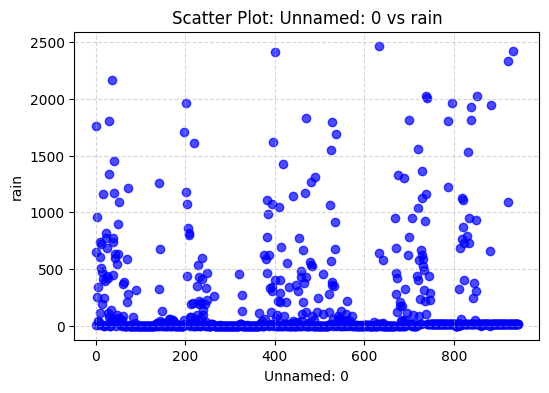

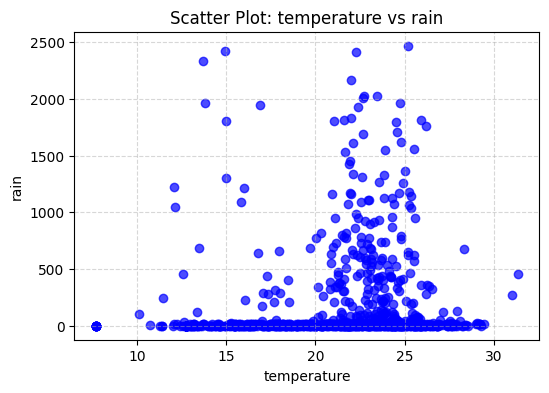

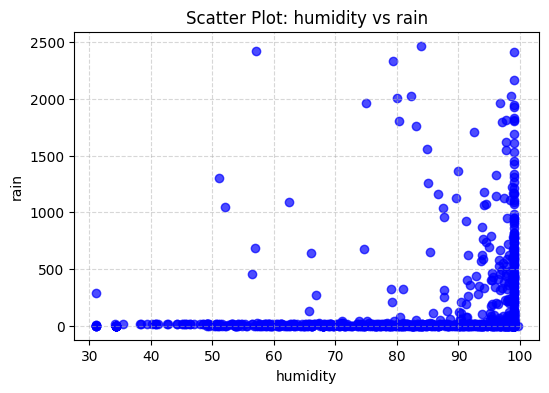

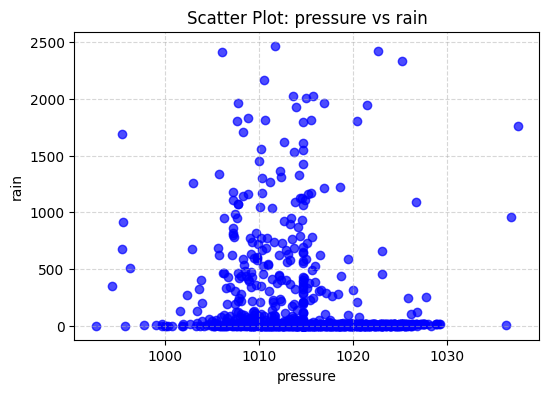

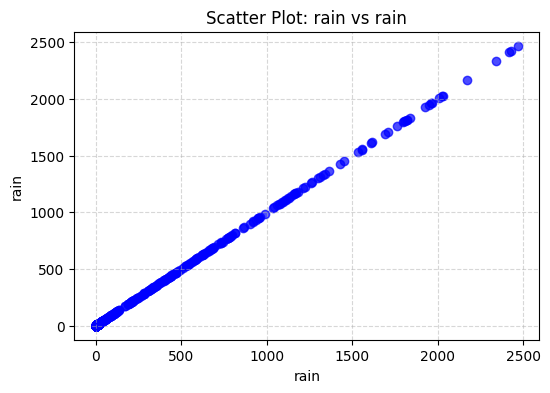

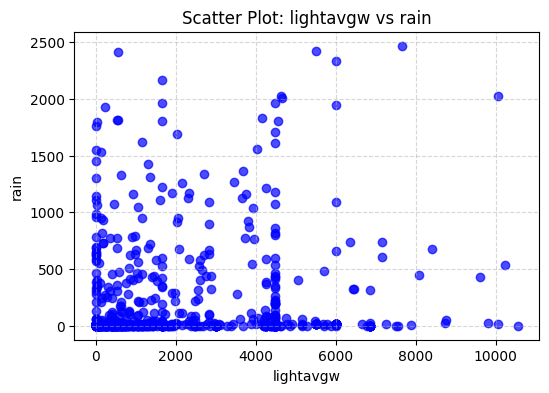

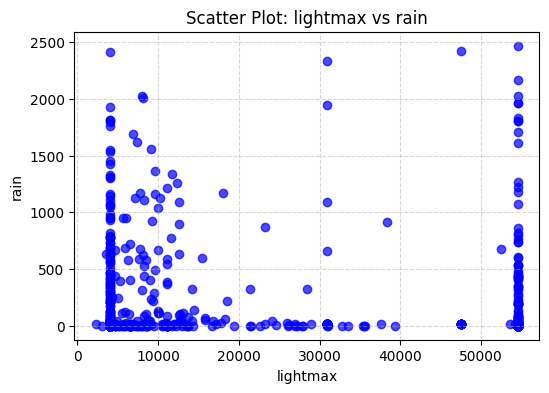

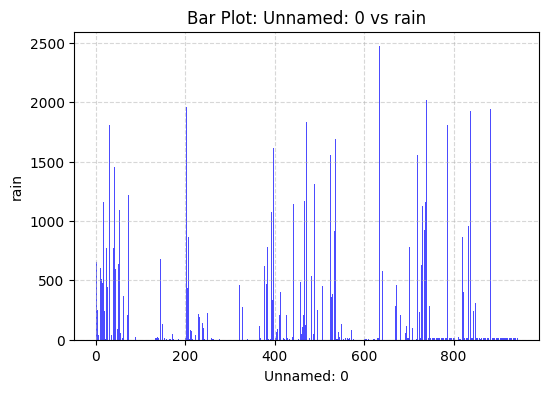

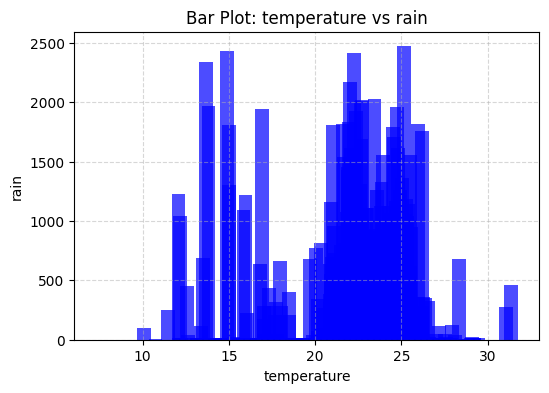

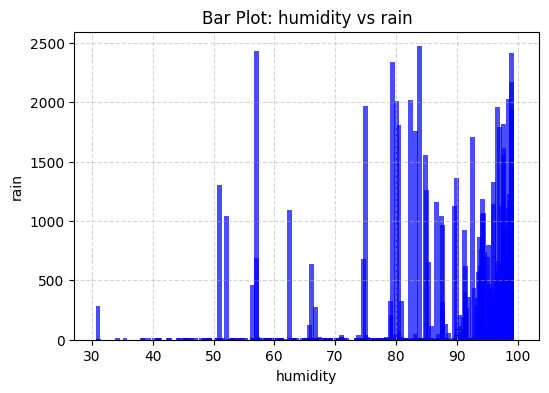

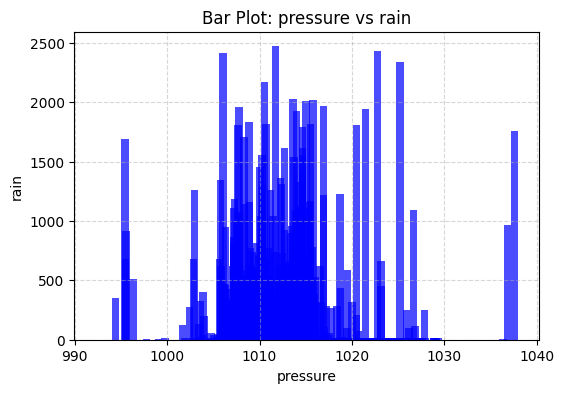

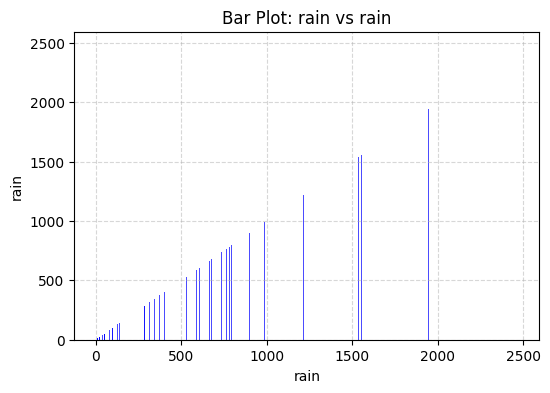

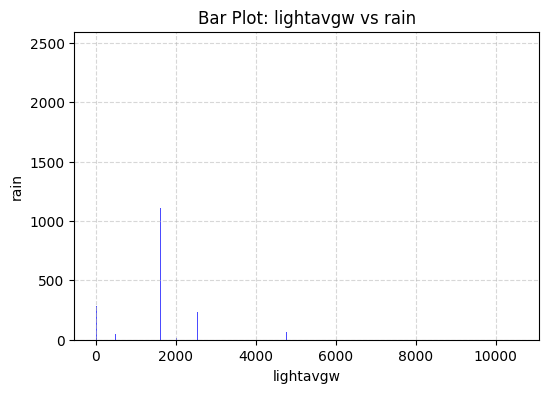

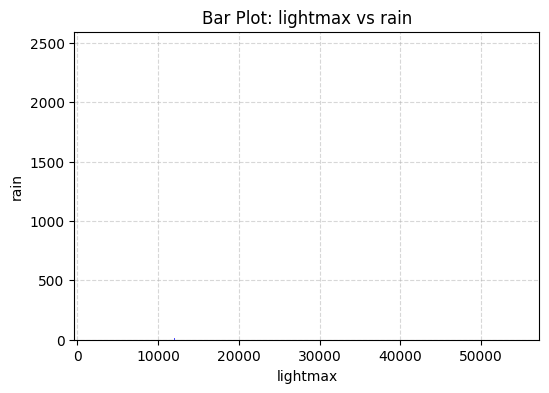

In [165]:
# Plot correlation with Target attribute

demo_df=pd.read_csv('landslide data corrected.csv')

print("\n#Scatter Plot between each attribute and the Target")
for col in demo_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.scatter(demo_df[col], demo_df["rain"], color='blue', alpha=0.7)
    plt.title(f"Scatter Plot: {col} vs rain")
    plt.xlabel(col)
    plt.ylabel("rain")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()



for col in demo_df.columns[:-1]:
    plt.figure(figsize=(6, 4))
    plt.bar(demo_df[col], demo_df["rain"], color='blue', alpha=0.7)
    plt.title(f"Bar Plot: {col} vs rain")
    plt.xlabel(col)
    plt.ylabel("rain")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.show()

In [124]:
df3=pd.read_csv('landslide data corrected.csv')
for col in df3.columns:
      print("\nThe minimum and maximum of ",col, df3[col].min(),df3[col].max())


The minimum and maximum of  Unnamed: 0 0 944

The minimum and maximum of  temperature 7.6729 31.375

The minimum and maximum of  humidity 31.0 99.72

The minimum and maximum of  pressure 992.6545833333 1037.6043859649

The minimum and maximum of  rain 0.0 2470.5

The minimum and maximum of  lightavgw 0.0 10565.3523

The minimum and maximum of  lightmax 2259.0 54612.0

The minimum and maximum of  moisture 0.0 100.0


In [112]:
def minmaxnormal(data):
    normalised_data=(data-data.min())/(data.max()-data.min())
    return normalised_data
data=pd.read_csv('landslide data corrected.csv')
normaliseddata=minmaxnormal(data)
normaliseddata

,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.000000,0.750813,0.744870,0.972024,0.002732,0.000521,0.033255,0.000000
1,0.001059,0.781369,0.758864,1.000000,0.713115,0.001121,0.033255,0.056930
2,0.002119,0.738218,0.790751,0.489952,0.264117,0.000830,0.033255,0.068511
3,0.003178,0.701440,0.824892,0.983383,0.389800,0.000836,0.033255,0.060373
4,0.004237,0.691767,0.824304,0.782566,0.102914,0.025993,0.039616,0.312385
...,...,...,...,...,...,...,...,...
940,0.995763,0.379138,0.403031,0.759577,0.007286,0.522569,0.863389,0.544222
941,0.996822,0.331275,0.468031,0.775102,0.007286,0.522569,0.863389,0.545674
942,0.997881,0.343543,0.410547,0.815664,0.007286,0.522569,0.863389,0.548794
943,0.998941,0.376035,0.343942,0.759108,0.007286,0.522569,0.863389,0.550286


In [113]:
def minmaxnormal(data):
    normalised_data=0+((data-data.min())*(20))/(data.max()-data.min())
    return normalised_data
data=pd.read_csv('landslide data corrected.csv')
normaliseddata=minmaxnormal(data)
normaliseddata

,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.000000,15.016264,14.897410,19.440482,0.054645,0.010411,0.665100,0.00000
1,0.021186,15.627375,15.177276,20.000000,14.262295,0.022422,0.665100,1.13860
2,0.042373,14.764354,15.815026,9.799041,5.282332,0.016600,0.665100,1.37022
3,0.063559,14.028808,16.497838,19.667663,7.795993,0.016726,0.665100,1.20746
4,0.084746,13.835339,16.486074,15.651319,2.058288,0.519856,0.792314,6.24770
...,...,...,...,...,...,...,...,...
940,19.915254,7.582754,8.060623,15.191535,0.145719,10.451375,17.267778,10.88444
941,19.936441,6.625506,9.360629,15.502032,0.145719,10.451375,17.267778,10.91348
942,19.957627,6.870868,8.210934,16.313276,0.145719,10.451375,17.267778,10.97588
943,19.978814,7.520692,6.878845,15.182168,0.145719,10.451375,17.267778,11.00572


In [125]:
df4=pd.read_csv('landslide data corrected.csv')
for col in df4.columns[2:]:
      print("\nThe mean and standard deviation of col ",col, df4[col].mean(),df4[col].std())
def standard(data1):
    normalised_data=(data-data.mean())/data.std()
    return normalised_data
data1=pd.read_csv('landslide data corrected.csv')
normaliseddata=standard(data1)
normaliseddata    


The mean and standard deviation of col  humidity 83.47993155555555 18.210064667980546

The mean and standard deviation of col  pressure 1014.7931303676331 6.120192454292754

The mean and standard deviation of col  rain 170.3042433862434 398.70505185681856

The mean and standard deviation of col  lightavgw 2237.8998394708997 2206.422850476602

The mean and standard deviation of col  lightmax 21788.62328042328 22064.993088694104

The mean and standard deviation of col  moisture 32.38605259259259 33.653244650764854


,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,-1.729303,0.976593,-0.070973,3.521743,-0.410214,-1.011773,-0.806192,-0.962346
1,-1.725639,1.142860,-0.018166,3.727212,3.991536,-1.008898,-0.806192,-0.793179
2,-1.721976,0.908055,0.102169,-0.018839,1.209405,-1.010292,-0.806192,-0.758766
3,-1.718312,0.707932,0.231006,3.605170,1.988176,-1.010261,-0.806192,-0.782948
4,-1.714648,0.655294,0.228787,2.130266,0.210546,-0.889801,-0.791100,-0.034099
...,...,...,...,...,...,...,...,...
940,1.714648,-1.045872,-1.360985,1.961421,-0.381997,1.488030,1.163444,0.654800
941,1.718312,-1.306314,-1.115691,2.075444,-0.381997,1.488030,1.163444,0.659115
942,1.721976,-1.239558,-1.332624,2.373354,-0.381997,1.488030,1.163444,0.668386
943,1.725639,-1.062757,-1.583971,1.957982,-0.381997,1.488030,1.163444,0.672819


In [135]:

corrected_df=pd.read_csv('landslide data corrected.csv')
col = corrected_df.columns
data_minmax = corrected_df.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
data_minmax[col] = scaler_minmax.fit_transform(corrected_df[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
data_minmax


Min-Max Normalized Data (Range 0-1) using Scikit-learn:


,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.000000,0.750813,0.744870,0.972024,0.002732,0.000521,0.033255,0.000000
1,0.001059,0.781369,0.758864,1.000000,0.713115,0.001121,0.033255,0.056930
2,0.002119,0.738218,0.790751,0.489952,0.264117,0.000830,0.033255,0.068511
3,0.003178,0.701440,0.824892,0.983383,0.389800,0.000836,0.033255,0.060373
4,0.004237,0.691767,0.824304,0.782566,0.102914,0.025993,0.039616,0.312385
...,...,...,...,...,...,...,...,...
940,0.995763,0.379138,0.403031,0.759577,0.007286,0.522569,0.863389,0.544222
941,0.996822,0.331275,0.468031,0.775102,0.007286,0.522569,0.863389,0.545674
942,0.997881,0.343543,0.410547,0.815664,0.007286,0.522569,0.863389,0.548794
943,0.998941,0.376035,0.343942,0.759108,0.007286,0.522569,0.863389,0.550286


In [129]:
corrected_df=pd.read_csv('landslide data corrected.csv')
col = corrected_df.columns
data_minmax = corrected_df.copy()
scaler_minmax = MinMaxScaler(feature_range=(0, 20))
data_minmax[col] = scaler_minmax.fit_transform(corrected_df[col])
print("Min-Max Normalized Data (Range 0-1) using Scikit-learn:")
data_minmax

Min-Max Normalized Data (Range 0-1) using Scikit-learn:


,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,0.000000,15.016264,14.897410,19.440482,0.054645,0.010411,0.665100,0.00000
1,0.021186,15.627375,15.177276,20.000000,14.262295,0.022422,0.665100,1.13860
2,0.042373,14.764354,15.815026,9.799041,5.282332,0.016600,0.665100,1.37022
3,0.063559,14.028808,16.497838,19.667663,7.795993,0.016726,0.665100,1.20746
4,0.084746,13.835339,16.486074,15.651319,2.058288,0.519856,0.792314,6.24770
...,...,...,...,...,...,...,...,...
940,19.915254,7.582754,8.060623,15.191535,0.145719,10.451375,17.267778,10.88444
941,19.936441,6.625506,9.360629,15.502032,0.145719,10.451375,17.267778,10.91348
942,19.957627,6.870868,8.210934,16.313276,0.145719,10.451375,17.267778,10.97588
943,19.978814,7.520692,6.878845,15.182168,0.145719,10.451375,17.267778,11.00572


In [132]:
col = corrected_df.columns
data_standardized = corrected_df.copy()
scaler_standard = StandardScaler()
data_standardized[col] = scaler_standard.fit_transform(corrected_df[col])
print("Standardized Data using Scikit-learn:")
data_standardized

Standardized Data using Scikit-learn:


,Unnamed: 0,temperature,humidity,pressure,rain,lightavgw,lightmax,moisture
0,-1.730219,0.977110,-0.071011,3.523608,-0.410431,-1.012309,-0.806619,-0.962855
1,-1.726553,1.143466,-0.018176,3.729186,3.993650,-1.009432,-0.806619,-0.793599
2,-1.722887,0.908536,0.102223,-0.018849,1.210045,-1.010827,-0.806619,-0.759168
3,-1.719222,0.708307,0.231129,3.607079,1.989229,-1.010796,-0.806619,-0.783363
4,-1.715556,0.655641,0.228908,2.131394,0.210657,-0.890272,-0.791519,-0.034117
...,...,...,...,...,...,...,...,...
940,1.715556,-1.046426,-1.361706,1.962460,-0.382200,1.488818,1.164060,0.655147
941,1.719222,-1.307006,-1.116282,2.076543,-0.382200,1.488818,1.164060,0.659464
942,1.722887,-1.240214,-1.333329,2.374610,-0.382200,1.488818,1.164060,0.668740
943,1.726553,-1.063320,-1.584810,1.959019,-0.382200,1.488818,1.164060,0.673175
